## Customer Churn Analysis:

About - Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers.

Problem statement - To  build and compare several customer churn prediction models.


In [1]:
# Importing libraries.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Here we have,
- Senior Ctizen
- Tenure
- Monthly charges in int and float,


---    > There is some special value in Total charges as it is showing as object..


In [6]:
# checkin for null values..

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
#converting Total charges to numerical column..

In [9]:
pd.to_numeric(df.TotalCharges,errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


There are 11 rows having null values..

In [11]:
# dropping columns with null values...

In [12]:
df=df[df.TotalCharges!=' ']

In [13]:
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [14]:
# now converting Total charges to float

In [15]:
df['TotalCharges'].astype(str).astype(float)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

# EDA

In [16]:
# univariate Analysis

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
cat=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']

In [19]:
list(enumerate(cat))

[(0, 'gender'),
 (1, 'SeniorCitizen'),
 (2, 'Partner'),
 (3, 'Dependents'),
 (4, 'PhoneService'),
 (5, 'MultipleLines'),
 (6, 'InternetService'),
 (7, 'OnlineSecurity'),
 (8, 'OnlineBackup'),
 (9, 'DeviceProtection'),
 (10, 'TechSupport'),
 (11, 'StreamingTV'),
 (12, 'StreamingMovies'),
 (13, 'Contract'),
 (14, 'PaperlessBilling'),
 (15, 'PaymentMethod'),
 (16, 'Churn')]

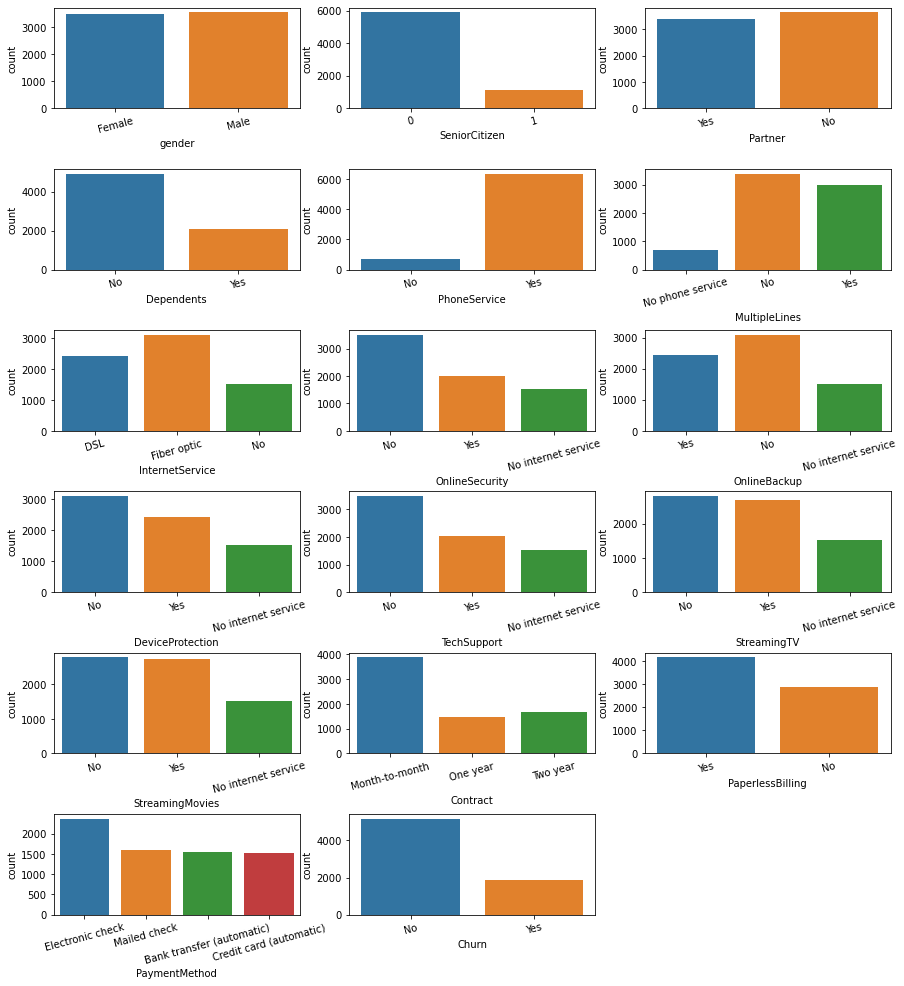

In [20]:
plt.figure(figsize=(15,18))
for i in enumerate(cat):
    plt.subplot(6,3,i[0]+1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.60)
    sns.countplot( i[1], data=df)
    plt.xticks(rotation=15)

observations:
    - There are more male customers than female.
    - the senior citizen count is low.
    - There are less partners, mostly there are single users.
    -  The count of dependents are low.
    - Mostly everyone has opted for phone service.
    - Multiple lines are opted by less users as comparared to those eho have single lines.
    - Internet service is widly used by Fiber optics then with DSL and lastly there are few who have opted for no Internet service.
    - Online Security, is opted by very few users.
    - online backup, there are few people who have online bakup.
    - Device Protection, mostly customers have not chosen to go with Device Protecion.
    - Tech support, is oped by few cutomers.
    - Streaming TV, the onces who do not stream tv are more
    - Streaming movies, few customers stream movies.
    - Contract, Mostly customers have Month to month Contract.
    - Customers widely chose to go with paperless billing.
    - Electronic check is the most favorable method of payment.
    - Churn rate is low.
    

In [21]:
con=[ 'MonthlyCharges', 'TotalCharges']

In [22]:
list(enumerate(con))

[(0, 'MonthlyCharges'), (1, 'TotalCharges')]

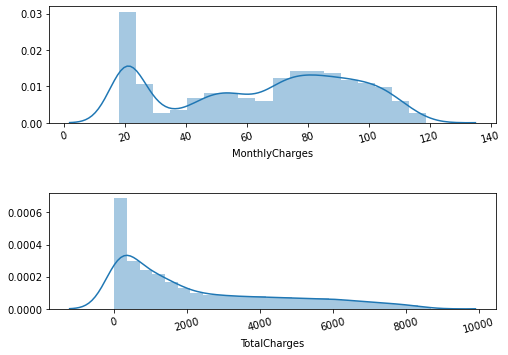

In [23]:
plt.figure(figsize=(8,6))
for i in enumerate(con):
    plt.subplot(2,1,i[0]+1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.60)
    sns.distplot( df[i[1]])
    
    plt.xticks(rotation=15)

Total charges are gradually increasing and mostly customers are paying between 4000-7000

##### BiVariate Analysis.

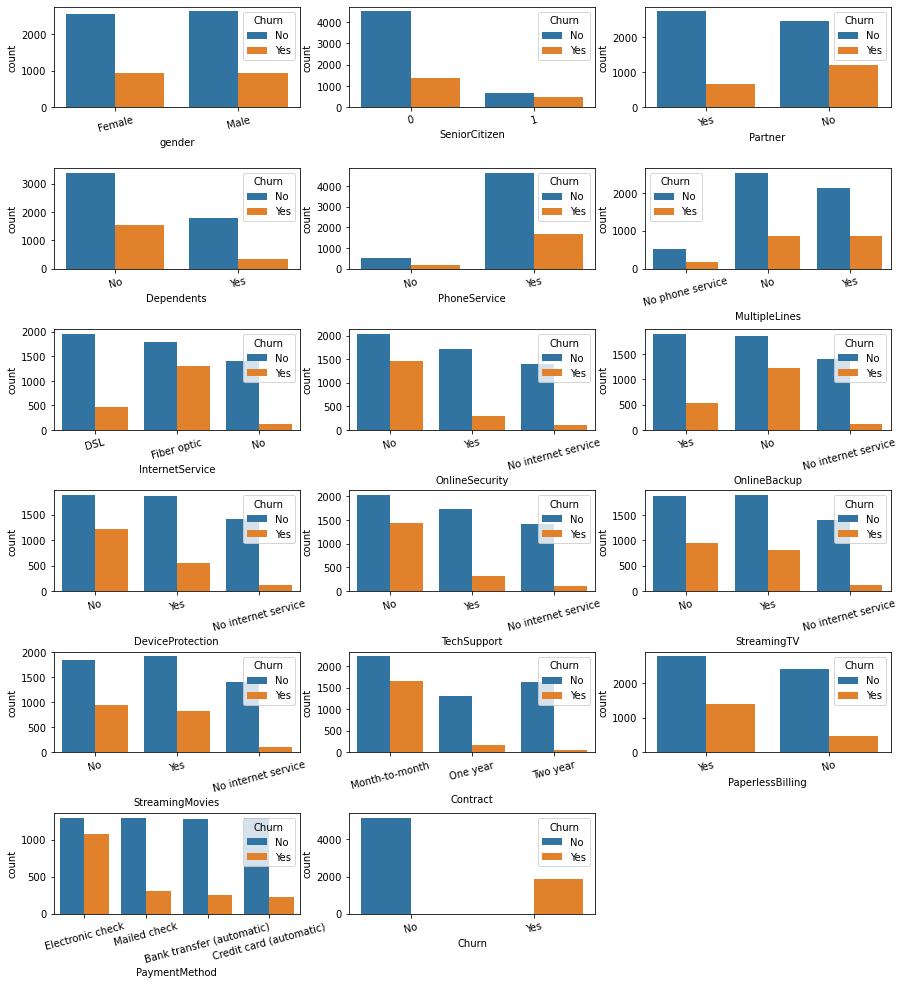

In [24]:
plt.figure(figsize=(15,18))
for i in enumerate(cat):
    plt.subplot(6,3,i[0]+1)
    plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.2, 
                    hspace=0.60)
    sns.countplot( i[1],hue='Churn', data=df)
    plt.xticks(rotation=15)

- Females have high chances of churn compared to males.
- Those who use phone service have higher chances of churn.
- Customers with no dependents are having high chances of churn.
- Multiple lines have less churn ration as compared to those who don't use multiple lines.
- In Internet service Fiber optics have higghest churn rate.
- Those who did'nt use Tech support have highher chances of churn.
- Month to Month have higher churn ratio.


#### Encoding data frame.

In [25]:
from sklearn.preprocessing import OrdinalEncoder

In [26]:
enc=OrdinalEncoder()

In [27]:
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [28]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2504.0,0.0
1,3953.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1465.0,0.0
2,2558.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,156.0,1.0
3,5524.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1399.0,0.0
4,6500.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,924.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1596.0,0.0
7039,1524.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5697.0,0.0
7040,3358.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2993.0,0.0
7041,5923.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2659.0,1.0


In [29]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,3515.500000,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.940557,0.872582,0.789249,...,0.903868,0.796359,0.984926,0.992890,0.688567,0.592719,1.573237,64.798208,3261.890216,0.265785
std,2030.107879,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.948627,0.737271,0.859962,...,0.880178,0.861674,0.885285,0.885385,0.832934,0.491363,1.067504,30.085974,1885.766048,0.441782
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1757.750000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.587500,1609.000000,0.000000
50%,3515.500000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3253.500000,0.000000
75%,5273.250000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.862500,4903.250000,1.000000
max,7031.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6529.000000,1.000000


In [30]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006235,-0.002368,-0.026509,-0.011871,0.007209,-0.006987,0.004497,-0.012335,0.013740,...,-0.006726,0.001763,-0.007650,-0.017207,0.015949,-0.002225,0.011754,-0.004445,0.001929,-0.017858
gender,0.006235,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,...,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,-0.005087,-0.008545
SeniorCitizen,-0.002368,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,...,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.036556,0.150541
Partner,-0.026509,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,...,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.061571,-0.149982
Dependents,-0.011871,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,...,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,-0.005469,-0.163128
tenure,0.007209,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,...,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.155539,-0.354049
PhoneService,-0.006987,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,...,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.082728,0.011691
MultipleLines,0.004497,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,...,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.115215,0.038043
InternetService,-0.012335,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,...,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.055138,-0.047097
OnlineSecurity,0.013740,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,...,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.044003,-0.289050


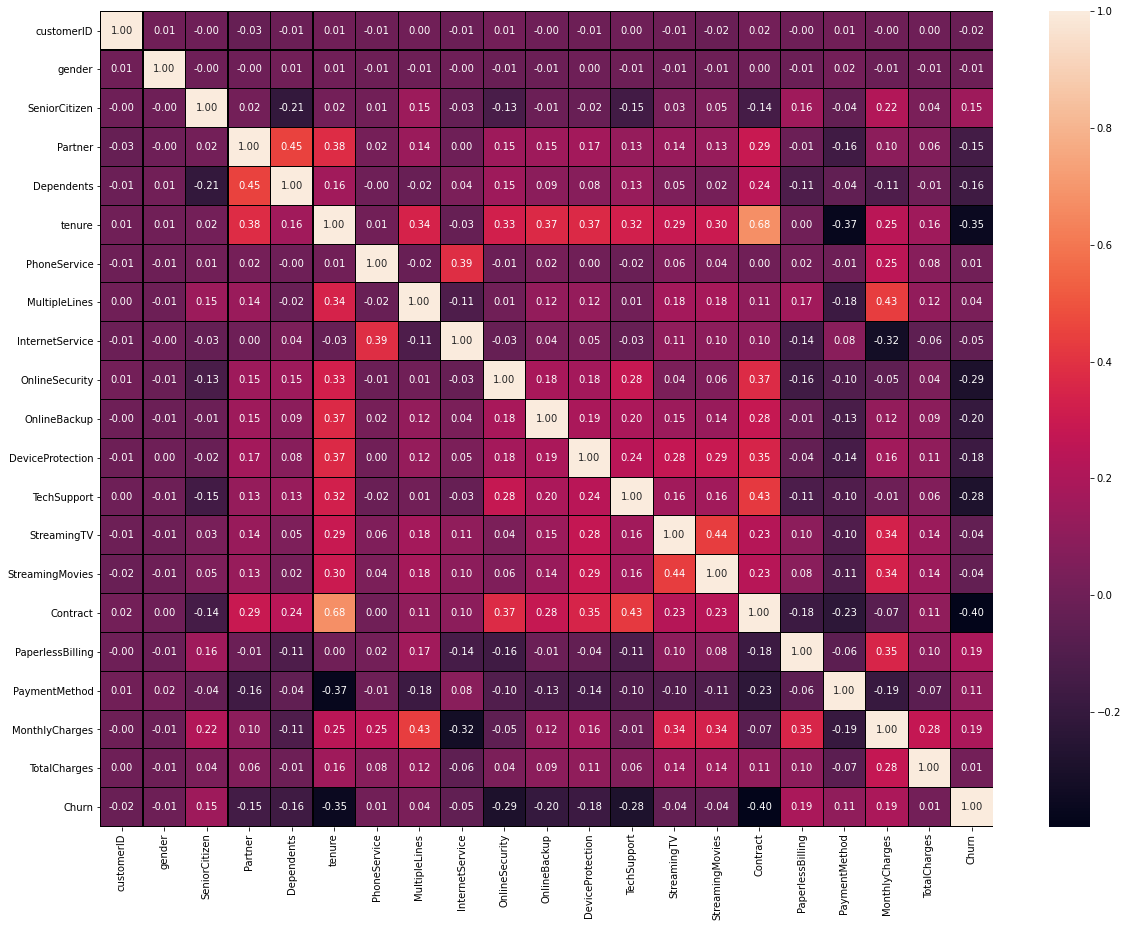

In [31]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, linewidths=0.1, linecolor="black", fmt="0.2f")
plt.show()

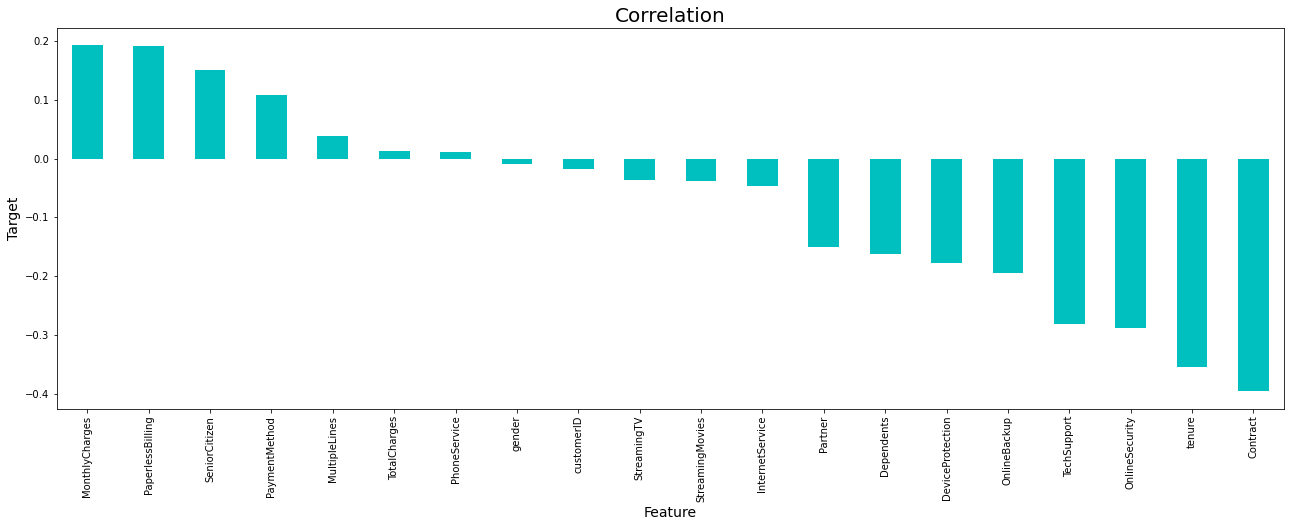

In [32]:
plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Target",fontsize=14)
plt.title('Correlation',fontsize=20)
plt.show()

- Monthly Charges and Paperless billing is directly corealted with the churn.
- While contract, tenure and online security are most inversly corelated with churn..


#### Pre Processing Pipeline.

In [33]:
features=df.drop('Churn',axis=1)
target=df["Churn"]

In [34]:
target.shape

(7032,)

In [35]:
features.shape

(7032, 20)

### Checking Outliers

customerID
AxesSubplot(0.125,0.125;0.775x0.755)


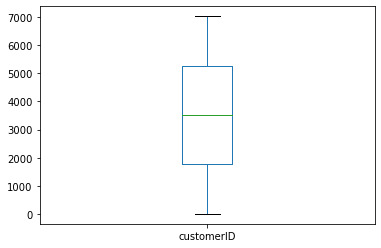

gender
AxesSubplot(0.125,0.125;0.775x0.755)


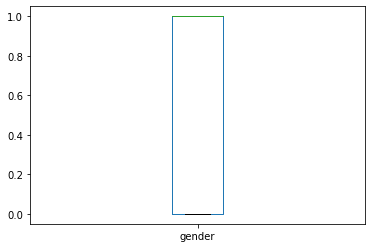

SeniorCitizen
AxesSubplot(0.125,0.125;0.775x0.755)


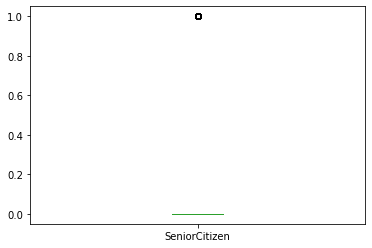

Partner
AxesSubplot(0.125,0.125;0.775x0.755)


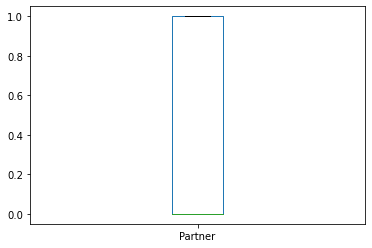

Dependents
AxesSubplot(0.125,0.125;0.775x0.755)


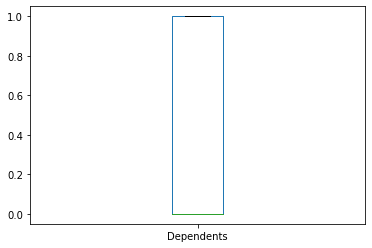

tenure
AxesSubplot(0.125,0.125;0.775x0.755)


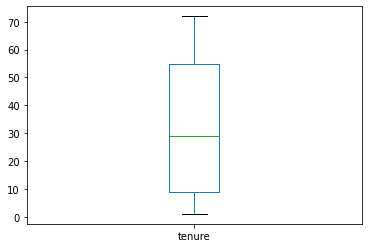

PhoneService
AxesSubplot(0.125,0.125;0.775x0.755)


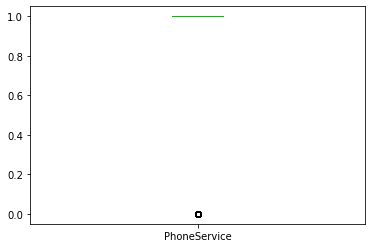

MultipleLines
AxesSubplot(0.125,0.125;0.775x0.755)


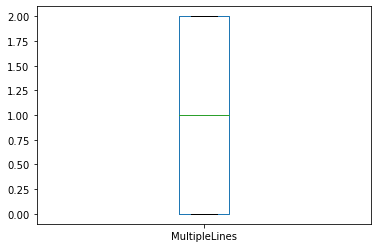

InternetService
AxesSubplot(0.125,0.125;0.775x0.755)


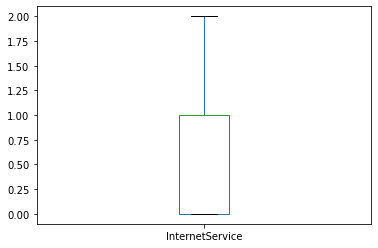

OnlineSecurity
AxesSubplot(0.125,0.125;0.775x0.755)


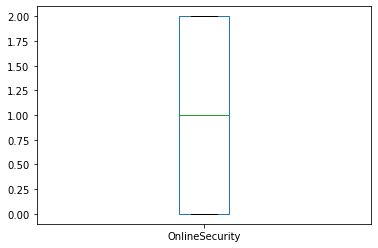

OnlineBackup
AxesSubplot(0.125,0.125;0.775x0.755)


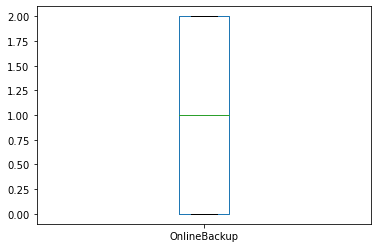

DeviceProtection
AxesSubplot(0.125,0.125;0.775x0.755)


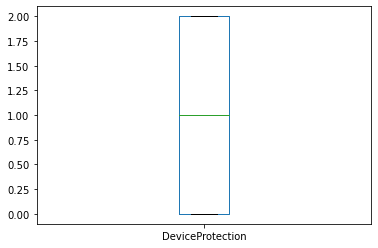

TechSupport
AxesSubplot(0.125,0.125;0.775x0.755)


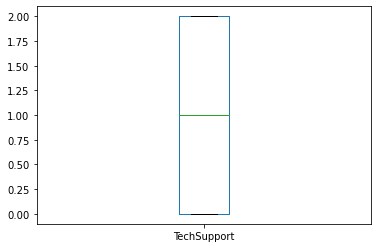

StreamingTV
AxesSubplot(0.125,0.125;0.775x0.755)


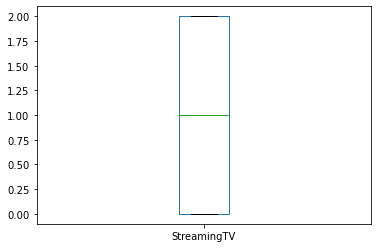

StreamingMovies
AxesSubplot(0.125,0.125;0.775x0.755)


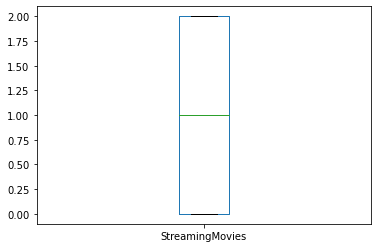

Contract
AxesSubplot(0.125,0.125;0.775x0.755)


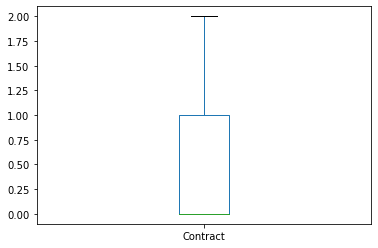

PaperlessBilling
AxesSubplot(0.125,0.125;0.775x0.755)


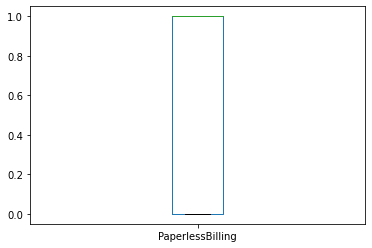

PaymentMethod
AxesSubplot(0.125,0.125;0.775x0.755)


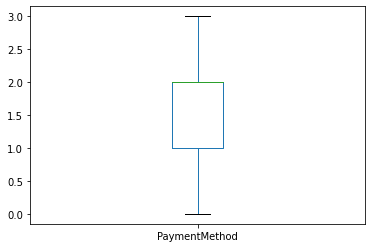

MonthlyCharges
AxesSubplot(0.125,0.125;0.775x0.755)


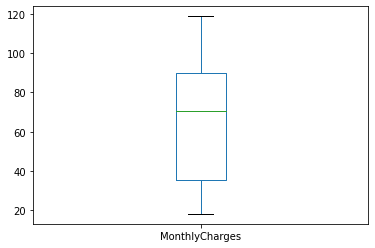

TotalCharges
AxesSubplot(0.125,0.125;0.775x0.755)


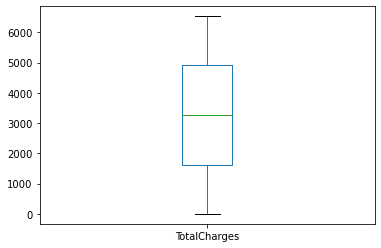

In [36]:
for i in features:
    print(i)
    print(features[i].plot.box())
    plt.show()

There are no such outliers in the data set.
- There's one in senior citizen but that might be the case.


#### Checking skewness

In [37]:
from scipy.stats import skew

customerID
AxesSubplot(0.125,0.125;0.775x0.755)


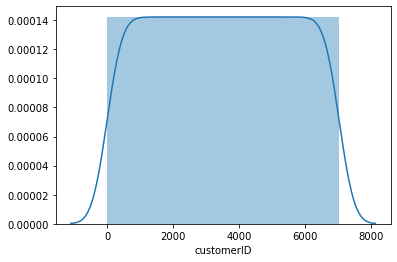

gender
AxesSubplot(0.125,0.125;0.775x0.755)


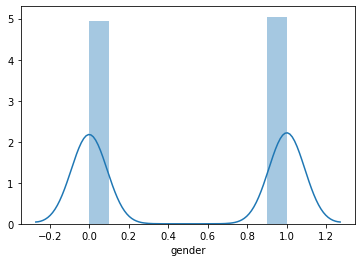

SeniorCitizen
AxesSubplot(0.125,0.125;0.775x0.755)


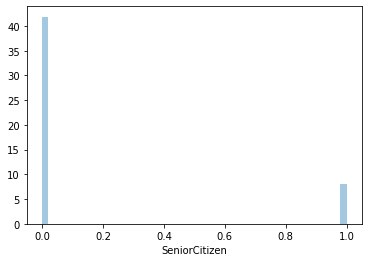

Partner
AxesSubplot(0.125,0.125;0.775x0.755)


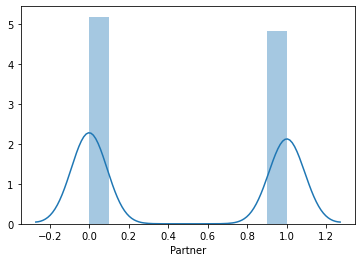

Dependents
AxesSubplot(0.125,0.125;0.775x0.755)


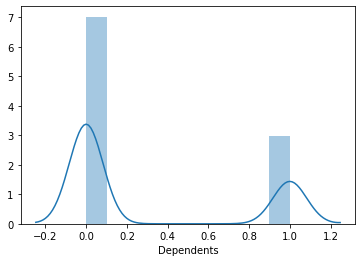

tenure
AxesSubplot(0.125,0.125;0.775x0.755)


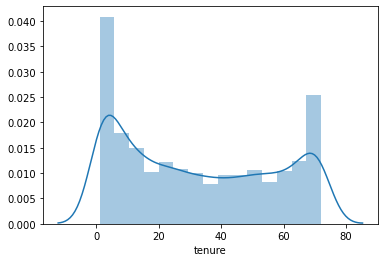

PhoneService
AxesSubplot(0.125,0.125;0.775x0.755)


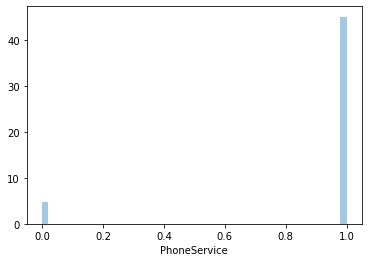

MultipleLines
AxesSubplot(0.125,0.125;0.775x0.755)


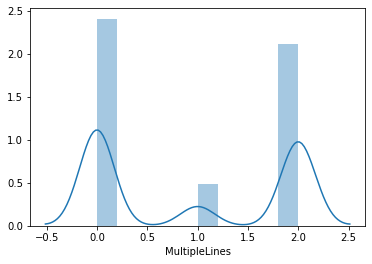

InternetService
AxesSubplot(0.125,0.125;0.775x0.755)


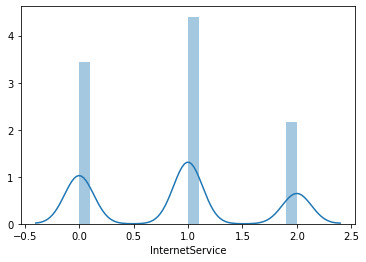

OnlineSecurity
AxesSubplot(0.125,0.125;0.775x0.755)


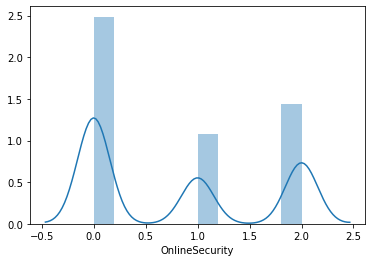

OnlineBackup
AxesSubplot(0.125,0.125;0.775x0.755)


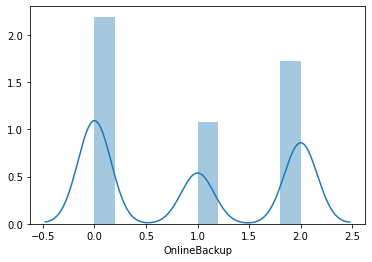

DeviceProtection
AxesSubplot(0.125,0.125;0.775x0.755)


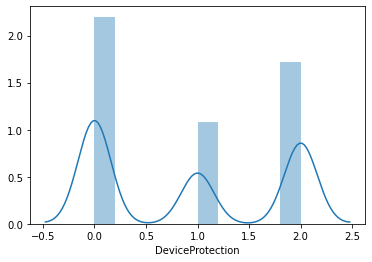

TechSupport
AxesSubplot(0.125,0.125;0.775x0.755)


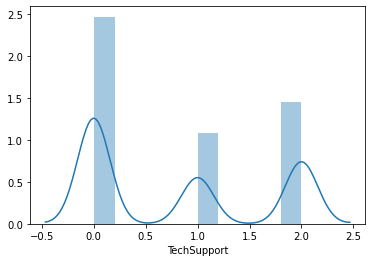

StreamingTV
AxesSubplot(0.125,0.125;0.775x0.755)


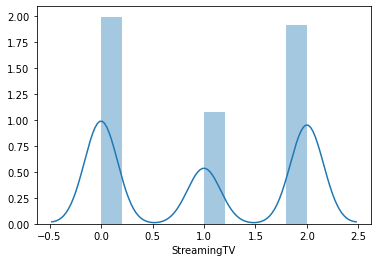

StreamingMovies
AxesSubplot(0.125,0.125;0.775x0.755)


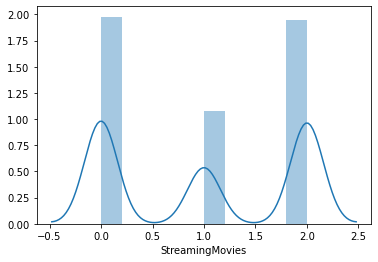

Contract
AxesSubplot(0.125,0.125;0.775x0.755)


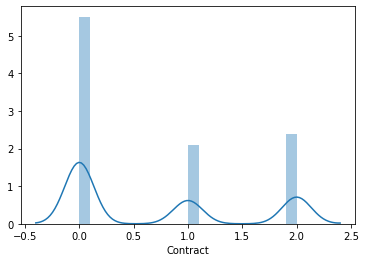

PaperlessBilling
AxesSubplot(0.125,0.125;0.775x0.755)


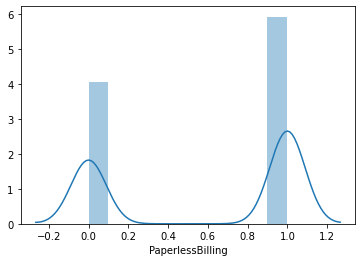

PaymentMethod
AxesSubplot(0.125,0.125;0.775x0.755)


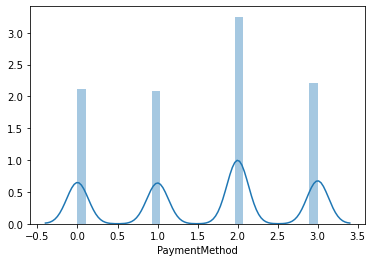

MonthlyCharges
AxesSubplot(0.125,0.125;0.775x0.755)


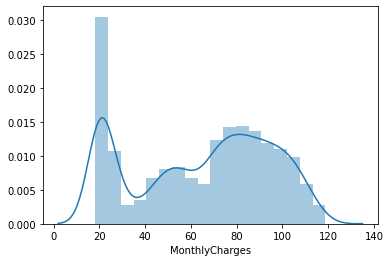

TotalCharges
AxesSubplot(0.125,0.125;0.775x0.755)


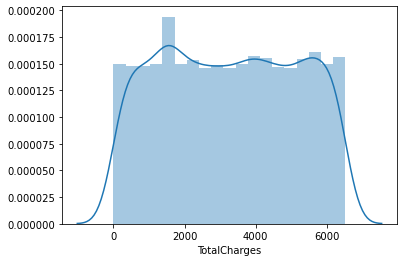

In [38]:
for i in features:
    print (i)
    print(sns.distplot(features[i]))
    plt.show()

In [39]:
features.skew()

customerID          0.000000
gender             -0.018776
SeniorCitizen       1.831103
Partner             0.070024
Dependents          0.880908
tenure              0.237731
PhoneService       -2.729727
MultipleLines       0.118623
InternetService     0.205704
OnlineSecurity      0.418619
OnlineBackup        0.184089
DeviceProtection    0.188013
TechSupport         0.403966
StreamingTV         0.029366
StreamingMovies     0.013851
Contract            0.635149
PaperlessBilling   -0.377503
PaymentMethod      -0.169388
MonthlyCharges     -0.222103
TotalCharges        0.015915
dtype: float64

The skewness is present but it is in categorical data. And we do not treak skewness in categorical data.

### scaling

In [40]:
#using min max scaler...

from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()


In [41]:
scaler=MinMaxScaler()
scaler.fit_transform(features)

array([[0.76304935, 0.        , 0.        , ..., 0.66666667, 0.11542289,
        0.38351968],
       [0.56222443, 1.        , 0.        , ..., 1.        , 0.38507463,
        0.22438352],
       [0.36381738, 1.        , 0.        , ..., 1.        , 0.35422886,
        0.0238934 ],
       ...,
       [0.4775992 , 0.        , 0.        , ..., 0.66666667, 0.11293532,
        0.4584163 ],
       [0.84241217, 1.        , 1.        , ..., 1.        , 0.55870647,
        0.40725992],
       [0.31588679, 1.        , 0.        , ..., 0.        , 0.86965174,
        0.82799816]])

#### ML

In [42]:
#Algorithms:-
   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [43]:
lr=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
rf=RandomForestClassifier()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

In [44]:
#using logistic regression

# taking test size as 30%


maxAccu=0
maxRS= 0
for i in range (1,200):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=i)
    lr.fit(features_train,target_train)
    predlr=lr.predict(features_test)
    acc=accuracy_score(target_test, predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
   
        
print('Best accuracy is',maxAccu,' on Random_state', maxRS)

Best accuracy is 0.8127962085308057  on Random_state 99


In [45]:
### Creating train-test split

features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.30,random_state=129)

### Logistic regression

In [46]:
lr.fit(features_train,target_train)
lr.score(features_train,target_train)
predlr=lr.predict(features_test)

print(accuracy_score(target_test,predlr))
print(confusion_matrix(target_test,predlr))
print(classification_report(target_test,predlr))

0.8075829383886256
[[1381  178]
 [ 228  323]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87      1559
         1.0       0.64      0.59      0.61       551

    accuracy                           0.81      2110
   macro avg       0.75      0.74      0.74      2110
weighted avg       0.80      0.81      0.80      2110



### GaussianNB

In [47]:
gnb.fit(features_train,target_train)
predgnb=gnb.predict(features_test)
print(accuracy_score(target_test,predgnb))

print(confusion_matrix(target_test,predgnb))

print(classification_report(target_test,predgnb))

0.7568720379146919
[[1174  385]
 [ 128  423]]
              precision    recall  f1-score   support

         0.0       0.90      0.75      0.82      1559
         1.0       0.52      0.77      0.62       551

    accuracy                           0.76      2110
   macro avg       0.71      0.76      0.72      2110
weighted avg       0.80      0.76      0.77      2110



### SupportVectorClassifier

In [48]:
svc.fit(features_train,target_train)
svc.score(features_train,target_train)
predsvc=svc.predict(features_test)

print(accuracy_score(target_test,predsvc))
print(confusion_matrix(target_test,predsvc))
print(classification_report(target_test,predsvc))

0.7388625592417062
[[1559    0]
 [ 551    0]]
              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85      1559
         1.0       0.00      0.00      0.00       551

    accuracy                           0.74      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.55      0.74      0.63      2110



### DecissionTreeClassifier

In [49]:
dtc.fit(features_train,target_train)
dtc.score(features_train,target_train)
preddtc=dtc.predict(features_test)

print(accuracy_score(target_test,preddtc))
print(confusion_matrix(target_test,preddtc))
print(classification_report(target_test,preddtc))

0.7497630331753554
[[1278  281]
 [ 247  304]]
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      1559
         1.0       0.52      0.55      0.54       551

    accuracy                           0.75      2110
   macro avg       0.68      0.69      0.68      2110
weighted avg       0.75      0.75      0.75      2110



### KNeighboursClassifier()

In [50]:
knn.fit(features_train,target_train)
knn.score(features_train,target_train)
predknn=knn.predict(features_test)

print(accuracy_score(target_test,predknn))
print(confusion_matrix(target_test,predknn))
print(classification_report(target_test,predknn))

0.7
[[1386  173]
 [ 460   91]]
              precision    recall  f1-score   support

         0.0       0.75      0.89      0.81      1559
         1.0       0.34      0.17      0.22       551

    accuracy                           0.70      2110
   macro avg       0.55      0.53      0.52      2110
weighted avg       0.64      0.70      0.66      2110



### RandomForestClassifier

In [51]:
rf.fit(features_train,target_train)
rf.score(features_train,target_train)
predrf=rf.predict(features_test)

print(accuracy_score(target_test,predrf))
print(confusion_matrix(target_test,predrf))
print(classification_report(target_test,predrf))

0.804739336492891
[[1416  143]
 [ 269  282]]
              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      1559
         1.0       0.66      0.51      0.58       551

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.73      2110
weighted avg       0.79      0.80      0.80      2110



### Cross-Validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
lrscore=cross_val_score(lr,features,target,cv=7)
print('lrscore is...', lrscore)
print('lrscore.mean',lrscore.mean(),'lrscore.std',lrscore.std())

print('..................')

gnbscore=cross_val_score(gnb,features,target,cv=7)
print('gnbscore is...',gnbscore)
print('gnbscore.mean',gnbscore.mean(),'gnbscore.std',gnbscore.std())

print('..................')

rfscore=cross_val_score(rf,features,target,cv=7)
print('rfscore is...', rfscore)
print('rfscore.mean',rfscore.mean(),'rfscore.std',rfscore.std())

print('..................')

svcscore=cross_val_score(svc,features,target,cv=7)
print('svcscore is...',svcscore)
print('svcscore.mean',svcscore.mean(),'svcscore.std',svcscore.std())

print('..................')

dtcscore=cross_val_score(dtc,features,target,cv=7)
print('dtcscore is...',dtcscore)
print('dtcscore.mean',dtcscore.mean(),'dtcscore.std',dtcscore.std())

print('..................')

knnscore=cross_val_score(knn,features,target,cv=7)
print('knnscore is...',knnscore)
print('knnscore.mean=',knnscore.mean(),'knnscore.std',knnscore.std())

lrscore is... [0.79900498 0.79900498 0.8079602  0.77014925 0.79581673 0.77888446
 0.80577689]
lrscore.mean 0.793799641519211 lrscore.std 0.013005707538188431
..................
gnbscore is... [0.75820896 0.75721393 0.76716418 0.75024876 0.73804781 0.75
 0.75697211]
gnbscore.mean 0.7539793916020354 gnbscore.std 0.008406757257499531
..................
rfscore is... [0.79303483 0.8039801  0.78507463 0.77810945 0.78984064 0.79581673
 0.80976096]
rfscore.mean 0.7936596188097644 rfscore.std 0.010006449813159131
..................
svcscore is... [0.73432836 0.73432836 0.73432836 0.73432836 0.73406375 0.73406375
 0.73406375]
svcscore.mean 0.7342149525565117 svcscore.std 0.00013094956793180434
..................
dtcscore is... [0.70945274 0.72835821 0.71641791 0.72139303 0.71613546 0.74501992
 0.73705179]
dtcscore.mean 0.7248327231231436 dtcscore.std 0.011735687850094587
..................
knnscore is... [0.69552239 0.68955224 0.66965174 0.69353234 0.69322709 0.67031873
 0.6812749 ]
knnscore.me

The minimum diffrence is of Linerar Regression i.e 1
- So this is my best fit model

### Hyper parameter tunning

In [116]:
# Selecting logistic Regression

In [55]:
from sklearn.model_selection import GridSearchCV

In [103]:
param_grid=  [
    {'penalty':['l1','l2','elasticnet'],
     'C' : np.logspace(-4,4,20),
     'solver' : ['lbfs','newton-cg','liblinear','sag','saga'],
     'max_iter' : [100,1000,2500,5000]
     }
]

In [104]:
clf = GridSearchCV(lr,param_grid=param_grid,cv=3, verbose=True, n_jobs=-1)

In [105]:
best_clf = clf.fit(features,target)

Fitting 3 folds for each of 1200 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 333 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1666 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2373 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3131 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  7.9min finished


In [106]:
best_clf.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='newton-cg')

In [109]:
print(f'Accuracy::  {best_clf.score(features,target):.3f}')

Accuracy::  0.806


### confusion matrix

In [110]:
from sklearn.metrics import confusion_matrix

In [113]:
target_pred = best_clf.predict(features_test)

Confusion Matrix is : 
 [[1419  140]
 [ 242  309]]


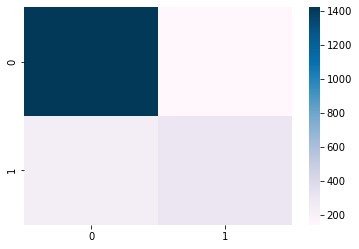

In [114]:
CM = confusion_matrix(target_test, target_pred)
print('Confusion Matrix is : \n', CM)


sns.heatmap(CM,cmap='PuBu')
plt.show()